In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.model_selection import train_test_split
import copy

In [50]:
df=pd.read_csv("marks.csv",header=None)  #head is none is importer if your dataset doesn't contain header and you want to set it

In [51]:
df.columns=["exam1","exam2","admitted"]

In [52]:
df

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [77]:
X=df[["exam1","exam2"]]
Y=df["admitted"]
m=len(Y)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.30)


C:\Users\Acer-\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exam1', ylabel='exam2'>

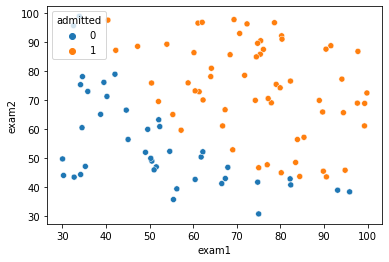

In [78]:
sns.scatterplot("exam1","exam2",data=df,hue="admitted")

In [94]:
print(x_train.shape)
#x_train.values.reshape(2,70)
#x_test=x_test.values.reshape(2,30)
#y_train=y_train.values.reshape(1,70)
#y_test=y_test.values.reshape(1,30)

(2, 70)


In [96]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#meaning you insert 2 input x1 and x2 and get output y

(2, 70)
(2, 30)
(1, 70)
(1, 30)


# So far we have just shape the data in the format that we want

In [99]:
#We Can do standrization or scaling to increase the effeciency but later
x_train.shape

(2, 70)

In [237]:
def Optimization(w,b,X, Y, num_iterations=2000, learning_rate=0.009, print_cost=True):
    
    """ get for you the w and b to use them in prediction new data"""
    

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
  
    costs = []
    for i in range(num_iterations):
        #Batch Grident Decent here each iteration is epoch
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w  = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)       
            # Print the cost every 100 training iterations
            if print_cost:
                    print ("Cost after iteration %i: %f" %(i, cost))
    #Testing the model                
    Y_prediction_train= predict(w,b,x_train)    
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))           
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs   
            
    

In [238]:
def sigmoid(z):
    s=1/(1+np.exp(-z))          
    return s

In [239]:
def Initialization(nx):
    w=np.random.randn(nx,1)
    b=0
    return w,b

In [240]:
def propagate(w,b,X,Y):
    #1 epoch
    m = X.shape[1]
     # FORWARD PROPAGATION (FROM X TO COST)
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    cost=np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    DZ=A-Y
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw=(np.dot(X,DZ.T))/m
    db=np.sum(DZ)/m
    cost=-cost/m
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [241]:
w,b=Initialization(x_train.shape[0])
Optimization(w,b,x_train,y_train)

Cost after iteration 0: 36.128081
Cost after iteration 100: 7.400888
Cost after iteration 200: 10.842487
Cost after iteration 300: nan
Cost after iteration 400: 0.850851
Cost after iteration 500: 1.025154
Cost after iteration 600: nan
Cost after iteration 700: 0.813005
Cost after iteration 800: 11.513804
Cost after iteration 900: 7.632814
Cost after iteration 1000: nan
Cost after iteration 1100: 4.638313
Cost after iteration 1200: 8.002299
Cost after iteration 1300: 6.249394
Cost after iteration 1400: 6.608829
Cost after iteration 1500: 0.938889
Cost after iteration 1600: nan
Cost after iteration 1700: 5.044235
Cost after iteration 1800: nan
Cost after iteration 1900: 4.973161


<ipython-input-240-78b76642cccf>:7: RuntimeWarning: divide by zero encountered in log
  cost=np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
<ipython-input-240-78b76642cccf>:7: RuntimeWarning: invalid value encountered in multiply
  cost=np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))


train accuracy: 42.85714285714286 %


({'w': array([[-0.01959288],
         [ 0.00401328]]),
  'b': 0.26194157743205515},
 {'dw': array([[28.25949042],
         [29.55672863]]),
  'db': 0.42857142837160617},
 [array(36.12808053),
  array(7.40088772),
  array(10.84248667),
  array(nan),
  array(0.85085114),
  array(1.02515388),
  array(nan),
  array(0.81300457),
  array(11.51380394),
  array(7.63281373),
  array(nan),
  array(4.63831277),
  array(8.00229911),
  array(6.24939364),
  array(6.60882912),
  array(0.93888896),
  array(nan),
  array(5.04423474),
  array(nan),
  array(4.97316115)])

# Starting New Approuch

In [255]:
def initialize_with_zeros(dim):

    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w=np.random.randn(dim,1)*0.1
    b=0.0
    # YOUR CODE ENDS HERE

    return w, b

In [256]:
def propagate(w, b, X, Y):

    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost using np.dot. Don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    cost=np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))  #if error reshape
    DZ=A-Y
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw=(np.dot(X,DZ.T))/m
    db=np.sum(DZ)/m
    cost=-cost/m
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [257]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        
        grads, cost = propagate(w, b, X, Y)
                
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w  = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [258]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    Y_prediction=A
    # YOUR CODE ENDS HERE
    
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        
        Y_prediction = np.where(Y_prediction > 0.5,1,0)
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [259]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    w,b = initialize_with_zeros(X_train.shape[0])
   
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations,learning_rate, print_cost)
    
    #like this i have trained the model and i will get params and costs
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    w=params["w"]
    b=params["b"]
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test  = predict(w,b,X_test)
    
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [262]:
logistic_regression_model=model(x_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 7.943063
Cost after iteration 100: 0.706755
Cost after iteration 200: 0.700200
Cost after iteration 300: 4.990019
Cost after iteration 400: 5.019585
Cost after iteration 500: 0.707083
Cost after iteration 600: 4.887381
Cost after iteration 700: 0.734103
Cost after iteration 800: 0.706560
Cost after iteration 900: 5.026990
Cost after iteration 1000: 0.701641
Cost after iteration 1100: 5.059342
Cost after iteration 1200: 0.707521
Cost after iteration 1300: 5.095513
Cost after iteration 1400: 0.707758
Cost after iteration 1500: 5.101556
Cost after iteration 1600: 0.707998
Cost after iteration 1700: 5.104409
Cost after iteration 1800: 0.708119
Cost after iteration 1900: 5.106214
train accuracy: 52.85714285714286 %
test accuracy: 43.333333333333336 %


# بهجت تاني خالص